In [1]:
#import 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from requests import get
import fmpclient
from collections import defaultdict
import matplotlib.pyplot as plt 

In [2]:
api = fmpclient.FMPClient()

In [3]:
def url_import(stock_list, info_type,params = {'datatype': 'json'}): 
    
    
    #dict_info = dict_maker(stock_list)
    dict_info = defaultdict(list)
    err_list = []
    url_list = ['''https://fmpcloud.io/api/v3/{info_type}/{stock}?apikey=cb3b0c371586d9ce915d359479fe1c81'''
                .format(info_type=info_type, stock = stock) 
    for stock in stock_list]

    print(url_list[0])
    for url, stock in zip(url_list,stock_list):
        try:
            #import financial ratios
            financial = api.requester.GET(url, params)
           
        
            for period_dict in financial: 

                for key, value in period_dict.items():
                    

                   # if key == 'date': 
                    #    dict_info[stock]['date'].append(value)
                    
                    dict_info[key].append(value)
        
        except: 
            err_list.append(stock)
            pass 
        
        
    
            
    return dict_info, err_list 

In [4]:
def url_import_latest(stock_list, info_type,params = {'datatype': 'json'}): 
    
    
    #dict_info = dict_maker(stock_list)
    dict_info = defaultdict(list)
    err_list = []
    url_list = ['''https://fmpcloud.io/api/v3/{info_type}/{stock}?apikey=cb3b0c371586d9ce915d359479fe1c81'''
                .format(info_type=info_type, stock = stock) 
    for stock in stock_list]

    print(url_list[0])
    for url, stock in zip(url_list,stock_list):
        try:
            #import financial ratios
            financial = api.requester.GET(url, params)
           
        

            for key, value in financial[0].items():
                
                    

                   # if key == 'date': 
                    #    dict_info[stock]['date'].append(value)
                    
                dict_info[key].append(value)
        
        except: 
            err_list.append(stock)
            pass 
        
        
    
            
    return dict_info, err_list

In [5]:
def intrinsic_cash(cf_ests, grs,drs, lgr,shares,n):
    iv_dict = defaultdict(list)
    for cf_est in cf_ests: 
        for gr in grs: 
            iv_dict['{},{}%'.format(cf_est/1000,gr*100)] = []
            for dr in drs: 
                
                fcfn = [ cf_est * (1 + gr)**i for i in range(1,n+1)]
                dfn = [(1+dr)**i for i in range(1,n+1)]
                dcf = sum([fcf/df for fcf, df in zip(fcfn,dfn)])
                dpcf = ((cf_est * (1 + gr)**(n+1) * (1 + lgr)) / (dr - lgr)) * (1 / (1 + dr)**(n+1))
                iv = (dcf + dpcf) / shares
                iv_dict['{},{}%'.format(cf_est/1000,gr*100)].append(iv)
    return iv_dict

In [6]:
def intrn_avg(dict_iv): 
    dict_final = defaultdict(float)
    for key, value in dict_iv.items():
        dict_final[key] = np.mean(value)
    return dict_final
        

In [7]:
def intrinsic_bk(avg_div_yr, pbvPersh_est, gr,dr,n): 
    fbv = pbvPersh_est * (1 + gr)**n 
    div = avg_div_yr * ((1 - (1 / (1 + dr)**n)) / dr)
    return div + (fbv / (1 + dr)**n)

In [8]:
def annual_growth(f,i,n): 
    return ((f/i)**(1/n) - 1)

In [9]:
def price_ratios(df, price): 
    df['pe'] = price / df.eps 
    df['ps'] = price  / (df.revenue / df .shares)
    df['pb'] = price / df.bv
    df['pfcf'] = price / (df['freeCashFlow'] / df['shares'])
    df['pocf'] = price / (df['operatingCashFlow'] / df['shares'])
    return df

In [10]:
def metrics(df): 
    df['de'] =df['totalDebt'] /df['totalStockholdersEquity']
    df['curr'] = df['totalCurrentAssets'] / df['totalCurrentLiabilities']
    df['debtRatio'] = df['totalDebt'] / df['totalAssets']
    df['ocfRatio'] = df['operatingCashFlow'] / df['revenue']
    df['fcfRatio'] = df['freeCashFlow'] / df['revenue']
    df['roe'] = df['netIncome'] / df['totalStockholdersEquity']
    df['roi'] = df['netIncome'] / df['totalAssets']
    df['rof'] = df['freeCashFlow'] / df['totalStockholdersEquity']
    df['rocf'] = df['operatingCashFlow'] / df['totalStockholdersEquity']
    df['intCov'] = df['operatingIncome'] / df['interestExpense']
    df['bv'] = df['totalStockholdersEquity'] / df['shares']
    df['div']= np.abs(df['dividendsPaid'])/df['shares']
    df['fcf'] =df['freeCashFlow'] /df['shares']
    df['ocf'] = df['operatingCashFlow']/ df['shares']
    df['invTurnOver'] = np.abs(df['costOfRevenue']) / df['inventory']
    df['recTurnOver'] = df['revenue'] / df['netReceivables']
    df['payTurnOver'] = np.abs(df['costOfRevenue']) / df['accountPayables']
    df['ownerCash'] = df['freeCashFlow']  / df['revenue']
    df['gcf'] = np.abs(df['netCashUsedForInvestingActivites']) / df['operatingCashFlow']
    return df 
    

In [11]:
import re

# banks 
# fhb 

In [12]:
dict_fhb_cash,errs_fhb = url_import(['FHB'], 'cash-flow-statement')
dict_fhb_balance,errs_fhb = url_import(['FHB'], 'balance-sheet-statement')
dict_fhb_income,errs_fhb = url_import(['FHB'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/FHB?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/FHB?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/FHB?apikey=cb3b0c371586d9ce915d359479fe1c81


In [13]:
df_fhb_cash = pd.DataFrame(dict_fhb_cash)
df_fhb_bal = pd.DataFrame(dict_fhb_balance)
df_fhb_income = pd.DataFrame(dict_fhb_income)

In [14]:
df_fhb_bal.date = df_fhb_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_fhb_cash.date = df_fhb_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_fhb_income.date = df_fhb_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [15]:
df_fhb_bal.set_index(['date'], inplace = True)
df_fhb_cash.set_index(['date'], inplace = True)
df_fhb_income.set_index(['date'], inplace = True)

In [16]:
df_fhb_cash.drop('netIncome',axis = 1, inplace = True)
df_fhb_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [17]:
df_fhb = pd.concat([df_fhb_income,df_fhb_bal,df_fhb_cash],axis = 1)

In [18]:
df_fhb.drop(['symbol','period'],axis = 1, inplace =True)

In [19]:
df_fhb['shares'] = 129E06

In [20]:
df_fhb.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [21]:
df_fhb = df_fhb/1000

In [22]:
df_fhb[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_fhb[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [23]:
df_fhb = df_fhb.sort_index()

In [24]:
df_fhb_main = df_fhb.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [25]:
df_fhb_main['netIncome'] = df_fhb_income['netIncome'] / 1000

In [26]:
df_fhb = metrics(df_fhb)
df_fhb = price_ratios(df_fhb, 17)

# ANA

In [27]:
df_fhb.de

date
2016    0.003712
2017    0.000013
2018    0.237660
2019    0.227258
Name: de, dtype: float64

In [28]:
df_fhb.debtRatio

date
2016    0.000468
2017    0.000002
2018    0.028994
2019    0.029753
Name: debtRatio, dtype: float64

In [30]:
df_fhb.curr.mean()

33.37561011176448

In [31]:
df_fhb.intCov

date
2016    13.849412
2017     8.777881
2018     4.492218
2019     3.625207
Name: intCov, dtype: float64

In [34]:
df_fhb[['roe','rof','rocf','fcfRatio']].mean()

roe         0.094476
rof         0.102810
rocf        0.111705
fcfRatio    0.482481
dtype: float64

In [37]:
df_fhb.totalDebt

date
2016      9192.0
2017        34.0
2018    600052.0
2019    600019.0
Name: totalDebt, dtype: float64

In [36]:
df_fhb[['totalAssets','ocf','totalLiabilities','totalDebt']].apply(lambda x:
                                                                  annual_growth(x[-1],x[0],3))


totalAssets         0.008488
ocf                 0.104683
totalLiabilities    0.006573
totalDebt           3.026413
dtype: float64

In [40]:
annual_growth(1.1,0.7,3)

0.16260329205681456

In [41]:
df_fhb[['bv','div']].mean()

bv     19.717312
div     0.926141
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121948450>,
      dtype=object)

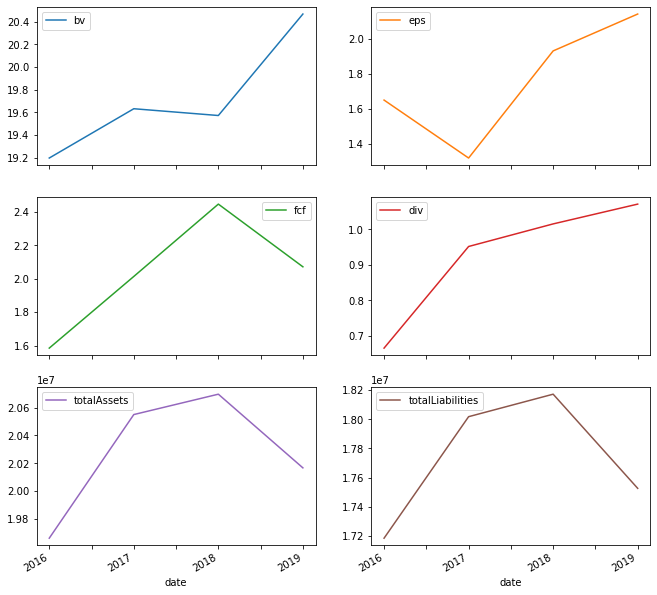

In [42]:
df_fhb[['bv','eps','fcf','div','totalAssets','totalLiabilities']].plot(figsize = (11,11),
                                                                      layout = (3,-1),
                                                                      subplots = True)

In [44]:
df_fhb[['netCashUsedProvidedByFinancingActivities','netCashUsedForInvestingActivites']].apply(
lambda x: annual_growth(np.abs(x[-1]),x[1],3))

/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


netCashUsedProvidedByFinancingActivities   NaN
netCashUsedForInvestingActivites           NaN
dtype: float64

In [ ]:
annual_growth()

In [46]:
df_fhb.netCashUsedProvidedByFinancingActivities

date
2016     78601.0
2017    683893.0
2018   -124611.0
2019   -981336.0
Name: netCashUsedProvidedByFinancingActivities, dtype: float64

In [47]:
df_fhb[['pe','ps','pb']]

,pe,ps,pb
date,,,
2016,10.303030,4.460291,0.885529
2017,12.878788,4.147094,0.865925
2018,8.808290,3.872383,0.868570
2019,7.943925,3.824542,0.830601


In [49]:
annual_growth(267150.0,204406.0,3)

0.0933364985793863

In [55]:
cf_fhb = [df_fhb.freeCashFlow.median()]
grs = [0.05,0.1]
drs = [0.1,0.15,0.2]
lgr = 0.03 

In [56]:
intrinsic_cash(cf_fhb, grs,drs,lgr,df_fhb.shares.values[0],3)

defaultdict(list,
            {'263.428,5.0%': [30.53181183495535,
              17.302533453839203,
              11.970899366859754],
             '263.428,10.0%': [36.17394462901439,
              20.281406917348157,
              13.896608860244863]})

In [58]:
intrinsic_bk(0.9,19,0.02,0.15,3)

15.312370839155095

# BAC 

In [59]:
dict_bac_cash,errs_bac = url_import(['BAC'], 'cash-flow-statement')
dict_bac_balance,errs_bac = url_import(['BAC'], 'balance-sheet-statement')
dict_bac_income,errs_bac = url_import(['BAC'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/BAC?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/BAC?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/BAC?apikey=cb3b0c371586d9ce915d359479fe1c81


In [70]:
df_bac_cash = pd.DataFrame(dict_bac_cash)
df_bac_bal = pd.DataFrame(dict_bac_balance)
df_bac_income = pd.DataFrame(dict_bac_income)

In [71]:
df_bac_bal.date = df_bac_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_bac_cash.date = df_bac_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_bac_income.date = df_bac_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [72]:
df_bac_bal.set_index(['date'], inplace = True)
df_bac_cash.set_index(['date'], inplace = True)
df_bac_income.set_index(['date'], inplace = True)

In [73]:
df_bac_cash.drop('netIncome',axis = 1, inplace = True)
df_bac_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [74]:
df_bac = pd.concat([df_bac_income,df_bac_bal,df_bac_cash],axis = 1)

In [75]:
df_bac.drop(['symbol','period'],axis = 1, inplace =True)

In [76]:
df_bac['shares'] = 8E09

In [77]:
df_bac.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [78]:
df_bac = df_bac/1000

In [79]:
df_bac[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_bac[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [80]:
df_bac = df_bac.sort_index()

In [81]:
df_bac_main = df_bac.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [82]:
df_bac_main['netIncome'] = df_bac_income['netIncome'] / 1000

In [92]:
df_bac = metrics(df_bac)
df_bac = price_ratios(df_bac, 23)

# ANA

In [84]:
df_bac.de

date
2010         NaN
2011    1.772974
2012    1.292713
2013    1.270701
2014    1.009714
2015    0.929291
2016    0.820143
2017    0.856820
2018    0.870585
2019    0.924425
Name: de, dtype: float64

In [86]:
df_bac.curr.mean()

230.19659534596315

In [88]:
df_bac[['roe','rof','rocf','fcfRatio']].median()

roe         0.062013
rof         0.109824
rocf        0.109824
fcfRatio    0.326740
dtype: float64

In [91]:
df_bac[['totalAssets','totalLiabilities','ocf','totalDebt']].apply(lambda x: annual_growth(
x[-1],x[1],7))

totalAssets         0.019312
totalLiabilities    0.019195
ocf                -0.006121
totalDebt          -0.070366
dtype: float64

In [95]:
annual_growth(0.8,0.2,8)

0.18920711500272103

In [113]:
df_bac[['bv','div']]

,bv,div
date,,
2010,0.000000,0.000000
2011,28.762625,0.217250
2012,29.619500,0.238625
2013,29.085625,0.209625
2014,30.433875,0.157750
2015,32.025625,0.261375
2016,33.355000,0.321625
2017,33.393250,0.503375
2018,33.165625,0.678000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121752990>,
      dtype=object)

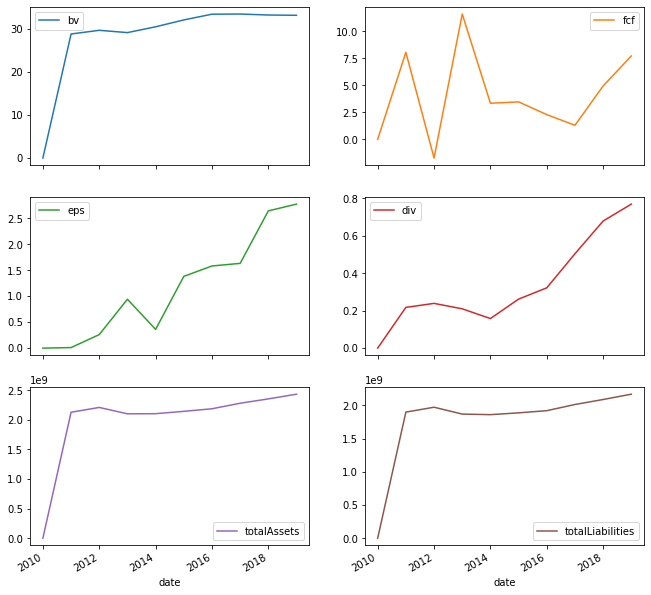

In [96]:
df_bac[['bv','fcf','eps','div','totalAssets','totalLiabilities']].plot(subplots = True,
                                                                      figsize = (11,11),
                                                                      layout = (3,-1))

In [98]:
df_bac[['pe','ps','pb']]

,pe,ps,pb
date,,,
2010,inf,298.217180,inf
2011,2300.000000,1.968883,0.799649
2012,88.461538,2.207982,0.776515
2013,24.468085,2.068764,0.790769
2014,63.888889,2.184054,0.755737
2015,16.666667,2.230114,0.718175
2016,14.556962,2.198301,0.689552
2017,14.110429,2.106420,0.688762
2018,8.712121,2.016505,0.693489


In [103]:
annual_growth(61777000.0,26739000.0,6)

0.14977697890574482

In [108]:
cf_bac = [df_bac.freeCashFlow.mean()]
grs = [0.05,0.1]


In [285]:
intrinsic_cash(cf_bac, grs,drs,lgr, df_bac.shares.values[0],7)

defaultdict(list,
            {'32792.4,4.0%': [61.57904930898297, 35.323105349591124],
             '32792.4,7.000000000000001%': [74.0731611619201,
              41.49036936308162]})

In [117]:
intrinsic_bk(0.4,33,0.03,0.10,10)

19.556378915430315

# cfg

In [118]:
dict_cfg_cash,errs_cfg = url_import(['CFG'], 'cash-flow-statement')
dict_cfg_balance,errs_cfg = url_import(['CFG'], 'balance-sheet-statement')
dict_cfg_income,errs_cfg = url_import(['CFG'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/CFG?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/CFG?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/CFG?apikey=cb3b0c371586d9ce915d359479fe1c81


In [119]:
df_cfg_cash = pd.DataFrame(dict_cfg_cash)
df_cfg_bal = pd.DataFrame(dict_cfg_balance)
df_cfg_income = pd.DataFrame(dict_cfg_income)

In [120]:
df_cfg_bal.date = df_cfg_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_cfg_cash.date = df_cfg_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_cfg_income.date = df_cfg_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [121]:
df_cfg_bal.set_index(['date'], inplace = True)
df_cfg_cash.set_index(['date'], inplace = True)
df_cfg_income.set_index(['date'], inplace = True)

In [122]:
df_cfg_cash.drop('netIncome',axis = 1, inplace = True)
df_cfg_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [123]:
df_cfg = pd.concat([df_cfg_income,df_cfg_bal,df_cfg_cash],axis = 1)

In [124]:
df_cfg.drop(['symbol','period'],axis = 1, inplace =True)

In [125]:
df_cfg['shares'] = 426E06

In [126]:
df_cfg.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [127]:
df_cfg = df_cfg/1000

In [128]:
df_cfg[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_cfg[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [129]:
df_cfg = df_cfg.sort_index()

In [130]:
df_cfg_main = df_cfg.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [131]:
df_cfg_main['netIncome'] = df_cfg_income['netIncome'] / 1000

In [132]:
df_cfg = metrics(df_cfg)
df_cfg = price_ratios(df_cfg, 20)

# ana

In [134]:
df_cfg.de.mean()

0.7532023443374608

In [135]:
df_cfg.debtRatio

date
2014    0.114190
2015    0.096362
2016    0.114694
2017    0.094764
2018    0.107415
2019    0.086410
Name: debtRatio, dtype: float64

In [136]:
df_cfg.curr

date
2014      2.071125
2015      6.005438
2016      5.273347
2017     50.002242
2018     49.921548
2019    504.931900
Name: curr, dtype: float64

In [140]:
df_bac.rof.mean()

0.1476132989696987

In [139]:
df_cfg[['roe','rof','rocf','fcfRatio']].mean()

roe         0.064236
rof         0.069100
rocf        0.077395
fcfRatio    0.355604
dtype: float64

In [141]:
df_cfg[['totalAssets','totalLiabilities','ocf']].apply(lambda x: annual_growth(x[-1],x[0],5))

totalAssets         0.045213
totalLiabilities    0.047906
ocf                 0.040719
dtype: float64

In [144]:
annual_growth(1.44,0.2,5)

0.48411139390205893

In [145]:
df_cfg[['bv','div']].mean()

bv     47.710876
div     0.594679
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124ca9690>,
      dtype=object)

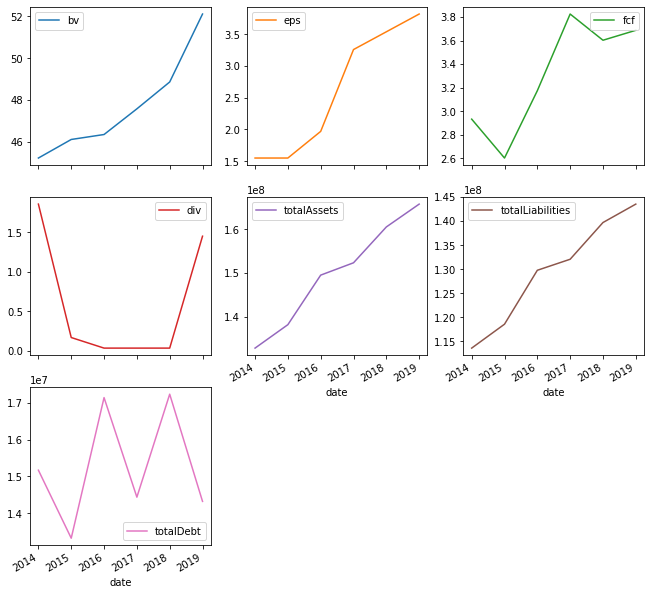

In [146]:
df_cfg[['bv','eps','fcf','div','totalAssets','totalLiabilities','totalDebt']].plot(figsize = (11,11),
                                                                                  subplots = True,
                                                                                  layout = (3,-1))

In [149]:
df_cfg[['netCashUsedProvidedByFinancingActivities','netCashUsedForInvestingActivites']]

,netCashUsedProvidedByFinancingActivities,netCashUsedForInvestingActivites
date,,
2014,9403000.0,-10274000.0
2015,4485000.0,-5905000.0
2016,10455000.0,-11326000.0
2017,1429000.0,-3984000.0
2018,6352000.0,-7077000.0
2019,1490000.0,-3875000.0


In [152]:
df_cfg.intCov

date
2014    3.493113
2015    2.794248
2016    3.019685
2017    2.559572
2018    1.780587
2019    1.429206
Name: intCov, dtype: float64

In [154]:
df_cfg[['pe','ps','pb']]

,pe,ps,pb
date,,,
2014,12.903226,2.581036,0.442184
2015,12.903226,2.504409,0.433676
2016,10.152284,2.267163,0.431458
2017,6.134969,2.041697,0.420326
2018,5.649718,1.879965,0.409281
2019,5.235602,1.846554,0.383766


In [157]:
annual_growth(1571000.0,1108000.0,5)

0.072327108028434

In [162]:
cf_cfg = [df_cfg.freeCashFlow.median()]
grs = [0.04,0.08]


In [284]:
intrinsic_cash(cf_cfg, grs,drs,lgr,df_cfg.shares.values[0],5)

defaultdict(list,
            {'1443.5,4.0%': [49.97514314067773, 28.568193051217737],
             '1443.5,7.000000000000001%': [57.842659118458634,
              32.58828415056725]})

In [169]:
intrinsic_bk(0.7,48,0.03,0.005,5)

57.722759005437396

# WFC 

In [224]:
dict_wf_cash,errs_wf = url_import(['WFC'], 'cash-flow-statement')
dict_wf_balance,errs_wf = url_import(['WFC'], 'balance-sheet-statement')
dict_wf_income,errs_wf = url_import(['WFC'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/WFC?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/WFC?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/WFC?apikey=cb3b0c371586d9ce915d359479fe1c81


In [225]:
df_wf_cash = pd.DataFrame(dict_wf_cash)
df_wf_bal = pd.DataFrame(dict_wf_balance)
df_wf_income = pd.DataFrame(dict_wf_income)

In [226]:
df_wf_bal.date = df_wf_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_wf_cash.date = df_wf_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_wf_income.date = df_wf_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [227]:
df_wf_bal.set_index(['date'], inplace = True)
df_wf_cash.set_index(['date'], inplace = True)
df_wf_income.set_index(['date'], inplace = True)

In [228]:
df_wf_cash.drop('netIncome',axis = 1, inplace = True)
df_wf_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [229]:
df_wf = pd.concat([df_wf_income,df_wf_bal,df_wf_cash],axis = 1)

In [230]:
df_wf.drop(['symbol','period'],axis = 1, inplace =True)

In [231]:
df_wf['shares'] = 4E09

In [232]:
df_wf.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [233]:
df_wf = df_wf/1000

In [234]:
df_wf[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_wf[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [235]:
df_wf = df_wf.sort_index()

In [236]:
df_wf_main = df_wf.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [237]:
df_wf_main['netIncome'] = df_wf_income['netIncome'] / 1000

In [238]:
df_wf = metrics(df_wf)
df_wf = price_ratios(df_wf, 27)

# ANA

In [239]:
df_wf.de

date
2010         NaN
2011    1.243894
2012    1.171370
2013    1.215931
2014    1.342023
2015    1.539208
2016    1.762983
2017    1.586365
2018    1.706876
2019    1.777772
Name: de, dtype: float64

In [240]:
df_wf.debtRatio

date
2010         NaN
2011    0.132772
2012    0.129697
2013    0.135481
2014    0.146674
2015    0.166177
2016    0.182299
2017    0.168195
2018    0.176610
2019    0.172604
Name: debtRatio, dtype: float64

In [241]:
df_wf.curr.mean()

1.8444113468683563

In [242]:
df_wf.intCov.mean()

5.0181741806406

In [243]:
df_bac[['roe','rof','fcfRatio']].mean()

roe         0.055552
rof         0.147613
fcfRatio    0.425530
dtype: float64

In [244]:
df_cfg[['roe','rof','fcfRatio']].mean()

roe         0.064236
rof         0.069100
fcfRatio    0.355604
dtype: float64

In [245]:
df_fhb[['roe','rof','fcfRatio']].mean()

roe         0.094476
rof         0.102810
fcfRatio    0.482481
dtype: float64

In [246]:
df_wf[['roe','rof','rocf','fcfRatio']].mean()

roe          0.115675
rof          0.143394
rocf         0.143394
fcfRatio    36.226236
dtype: float64

In [ ]:
annual_growth()

In [259]:
df_bac.commonStockRepurchased.mean()

-30428700.0

In [255]:
annual_growth(2,0.63,9)

0.1369549892390527

In [256]:
df_wf[['bv','div','commonStockRepurchased']].mean()

bv                        4.087895e+01
div                       1.455125e+00
commonStockRepurchased   -9.299100e+06
dtype: float64

In [264]:
df_.fcf

date
2016    1.584543
2017    2.013225
2018    2.445992
2019    2.070930
Name: fcf, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125d268d0>,
      dtype=object)

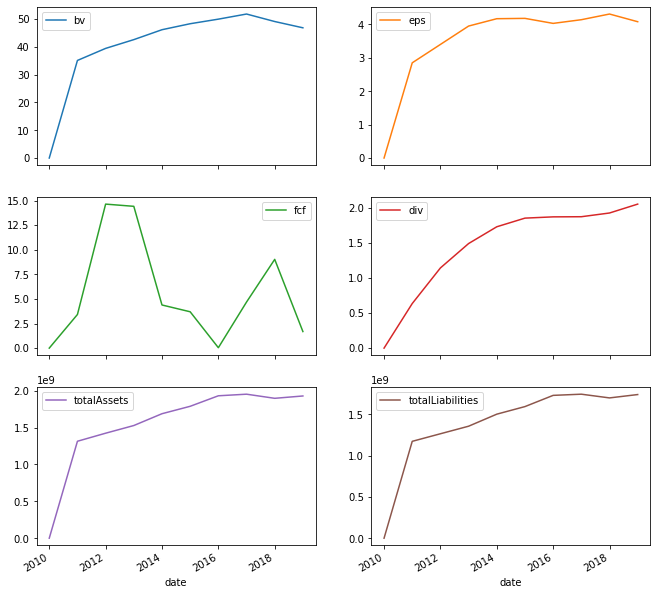

In [260]:
df_wf[['bv','eps','fcf','div','totalAssets','totalLiabilities']].plot(subplots = True,
                                                                     figsize = (11,11),
                                                                     layout =(3,-1))

In [271]:
annual_growth(18722000,13665000.0,7)

0.04600716124989135

In [286]:
cf_wf = [df_wf.freeCashFlow.median()]
grs = [0.04,0.07]
drs= [0.1,0.15,0.2]

In [287]:
intrinsic_cash(cf_wf,grs,drs,lgr,df_wf.shares.values[0],10)

defaultdict(list,
            {'16150.5,4.0%': [62.10112133868462,
              35.67391206953571,
              25.03892660521069],
             '16150.5,7.000000000000001%': [78.6188821858001,
              43.423497906190676,
              29.604656906831675]})

In [281]:
intrinsic_bk(1.5,41,0.03,0.15,7)

25.197190359079578

In [288]:
df_wf[['pe','ps','pb']]

,pe,ps,pb
date,,,
2010,inf,inf,inf
2011,9.473684,206.106870,0.770103
2012,7.941176,190.476190,0.685479
2013,6.835443,162.895928,0.634764
2014,6.474820,205.323194,0.585702
2015,6.459330,173.913043,0.559591
2016,6.699752,56.045667,0.541134
2017,6.521739,56.633456,0.521900
2018,6.264501,104.549855,0.550554


In [289]:
df_cfg[['pe','ps','pb']]

,pe,ps,pb
date,,,
2014,12.903226,2.581036,0.442184
2015,12.903226,2.504409,0.433676
2016,10.152284,2.267163,0.431458
2017,6.134969,2.041697,0.420326
2018,5.649718,1.879965,0.409281
2019,5.235602,1.846554,0.383766


# cit

In [290]:
dict_cit_cash,errs_cit = url_import(['CIT'], 'cash-flow-statement')
dict_cit_balance,errs_cit = url_import(['CIT'], 'balance-sheet-statement')
dict_cit_income,errs_cit = url_import(['CIT'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/CIT?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/CIT?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/CIT?apikey=cb3b0c371586d9ce915d359479fe1c81


In [291]:
df_cit_cash = pd.DataFrame(dict_cit_cash)
df_cit_bal = pd.DataFrame(dict_cit_balance)
df_cit_income = pd.DataFrame(dict_cit_income)

In [292]:
df_cit_bal.date = df_cit_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_cit_cash.date = df_cit_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_cit_income.date = df_cit_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [293]:
df_cit_bal.set_index(['date'], inplace = True)
df_cit_cash.set_index(['date'], inplace = True)
df_cit_income.set_index(['date'], inplace = True)

In [294]:
df_cit_cash.drop('netIncome',axis = 1, inplace = True)
df_cit_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [295]:
df_cit = pd.concat([df_cit_income,df_cit_bal,df_cit_cash],axis = 1)

In [296]:
df_cit.drop(['symbol','period'],axis = 1, inplace =True)

In [297]:
df_cit['shares'] = 98E06

In [298]:
df_cit.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [299]:
df_cit = df_cit/1000

In [300]:
df_cit[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_cit[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [301]:
df_cit = df_cit.sort_index()

In [302]:
df_cit_main = df_cit.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [303]:
df_cit_main['netIncome'] = df_cit_income['netIncome'] / 1000

In [304]:
df_cit = metrics(df_cit)
df_cit = price_ratios(df_cit, 17)

# ANA

In [306]:
df_cit.de.mean()

2.211700665689036

In [307]:
df_cit.debtRatio

date
2010    0.668167
2011    0.625353
2012    0.498996
2013    0.461401
2014    0.385459
2015    0.274658
2016    0.232748
2017    0.182115
2018    0.167269
Name: debtRatio, dtype: float64

In [309]:
df_cit.curr.mean()

12.702407328751143

In [310]:
df_cit.intCov

date
2010   -0.249651
2011    0.068060
2012   -0.156968
2013    0.680228
2014    0.626772
2015    0.524241
2016    0.027748
2017    0.266964
2018    0.781499
Name: intCov, dtype: float64

In [315]:
df_cit[['roe','rof','rocf','fcfRatio']]

,roe,rof,rocf,fcfRatio
date,,,,
2010,-0.000493,0.065781,0.065781,0.237883
2011,0.003004,0.096304,0.096304,0.477945
2012,-0.071063,0.109001,0.109001,0.858858
2013,0.076447,0.164457,0.164457,0.623247
2014,0.124602,0.140954,0.140954,0.610750
2015,0.096246,0.105419,0.105419,0.537654
2016,-0.084777,0.236626,0.236626,2.294397
2017,0.063962,0.071011,0.071011,0.515982
2018,0.075186,0.165220,0.165220,0.973736


In [316]:
df_cit[['totalAssets','ocf','totalLiabilities','totalDebt']].apply(lambda x: 
                                                                  annual_growth(x[-1],x[1],8))

totalAssets         0.008846
ocf                 0.017378
totalLiabilities    0.020014
totalDebt          -0.144468
dtype: float64

In [324]:
df_cit['netCashUsedProvidedByFinancingActivities']

date
2010   -10529400.0
2011    -7208800.0
2012    -2328900.0
2013     2342500.0
2014      821900.0
2015     -997300.0
2016    -2928800.0
2017   -13071800.0
2018     -942100.0
Name: netCashUsedProvidedByFinancingActivities, dtype: float64

In [326]:
annual_growth(982500.0,586500.0,9)

0.05900024428502504

In [331]:
cf_cit = [df_cit.freeCashFlow.median()]
grs = [0.04,0.07]


In [337]:
annual_growth(1.2,0.2,6)

0.3480061545972777

In [338]:
df_cit[['bv','div']].mean()

bv     88.769161
div     0.660884
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125e2a6d0>,
      dtype=object)

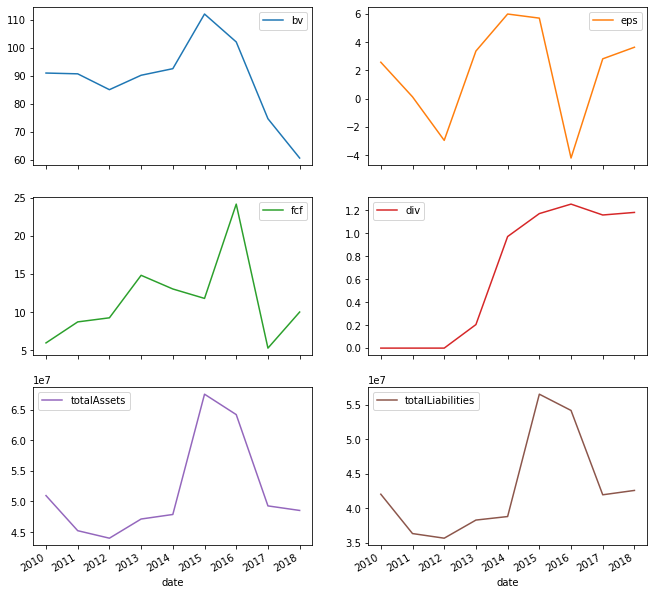

In [339]:
df_cit[['bv','eps','fcf','div','totalAssets','totalLiabilities']].plot(subplots = True, figsize = (11,11),
                                                                 layout = (3,-1))

In [334]:
intrinsic_cash(cf_cit, grs,drs,lgr,df_cit.shares.values[0],9)

defaultdict(list,
            {'982.5,4.0%': [153.06898037670146,
              87.92252781654106,
              61.71163939970511],
             '982.5,7.000000000000001%': [190.66011913373376,
              105.8573936980855,
              72.41449362423816]})

In [340]:
df_cit[['pe','ps','pb']]

,pe,ps,pb
date,,,
2010,6.589147,0.675725,0.186855
2011,130.769231,0.930207,0.187433
2012,-5.762712,1.574967,0.199885
2013,5.044510,0.714316,0.188487
2014,2.838063,0.795987,0.183705
2015,2.982456,0.773984,0.151757
2016,-4.047619,1.614967,0.166555
2017,6.028369,1.653762,0.227596
2018,4.670330,1.651140,0.280160


In [341]:
df_cit.freeCashFlow

date
2010     586500.0
2011     856000.0
2012     908500.0
2013    1453600.0
2014    1278300.0
2015    1157300.0
2016    2366900.0
2017     519800.0
2018     982500.0
Name: freeCashFlow, dtype: float64

In [343]:
intrinsic_bk(0.6, 70, 0.025,0.15,9 )

27.713286361985446

# hospitality & leisure 
# pk

In [366]:
dict_ccl_cash,errs_ccl = url_import(['CCL'], 'cash-flow-statement')
dict_ccl_balance,errs_ccl = url_import(['CCL'], 'balance-sheet-statement')
dict_ccl_income,errs_ccl = url_import(['CCL'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/CCL?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/CCL?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/CCL?apikey=cb3b0c371586d9ce915d359479fe1c81


In [367]:
df_ccl_cash = pd.DataFrame(dict_ccl_cash)
df_ccl_bal = pd.DataFrame(dict_ccl_balance)
df_ccl_income = pd.DataFrame(dict_ccl_income)

In [368]:
df_ccl_bal.date = df_ccl_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_ccl_cash.date = df_ccl_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_ccl_income.date = df_ccl_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [369]:
df_ccl_bal.set_index(['date'], inplace = True)
df_ccl_cash.set_index(['date'], inplace = True)
df_ccl_income.set_index(['date'], inplace = True)

In [370]:
df_ccl_cash.drop('netIncome',axis = 1, inplace = True)
df_ccl_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [371]:
df_ccl = pd.concat([df_ccl_income,df_ccl_bal,df_ccl_cash],axis = 1)

In [372]:
df_ccl.drop(['symbol','period'],axis = 1, inplace =True)

In [373]:
df_ccl['shares'] = 598E06

In [374]:
df_ccl.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [375]:
df_ccl = df_ccl/1000

In [376]:
df_ccl[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_ccl[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [377]:
df_ccl = df_ccl.sort_index()

In [378]:
df_ccl_main = df_ccl.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [379]:
df_ccl_main['netIncome'] = df_ccl_income['netIncome'] / 1000

In [380]:
df_ccl = metrics(df_ccl)
df_ccl = price_ratios(df_ccl, 14)

# ANAL

In [382]:
df_ccl.debtRatio

date
2007    0.271125
2008    0.289644
2009    0.284509
2010    0.230035
2011    0.234801
2012    0.225888
2013    0.236884
2014    0.213043
2015    0.223182
2016    0.231072
2017    0.213596
2018    0.223462
2019    0.254562
Name: debtRatio, dtype: float64

In [383]:
df_ccl.curr

date
2007    0.272176
2008    0.285418
2009    0.305617
2010    0.216160
2011    0.214906
2012    0.248093
2013    0.288244
2014    0.217165
2015    0.352358
2016    0.238829
2017    0.181364
2018    0.241743
2019    0.225594
Name: curr, dtype: float64

In [385]:
df_ccl.intCov.median()

6.208994708994709

In [388]:
df_ccl[['roe','rof','rocf','fcfRatio']].mean()

roe         0.091565
rof         0.041857
rocf        0.178450
fcfRatio    0.060468
dtype: float64

In [387]:
df_ccl.capitalExpenditure

date
2007    3312000.0
2008    3353000.0
2009    3380000.0
2010    3579000.0
2011    2696000.0
2012    2332000.0
2013    2149000.0
2014    2583000.0
2015    2294000.0
2016    3062000.0
2017    2944000.0
2018    3749000.0
2019    5429000.0
Name: capitalExpenditure, dtype: float64

In [389]:
df_ccl.

date
2007    0.920619
2008    0.959894
2009    1.012567
2010    0.916972
2011    0.704195
2012    0.598199
2013    0.725829
2014    0.730904
2015    0.545215
2016    0.647254
2017    0.580421
2018    0.631105
2019    0.963836
Name: gcf, dtype: float64

In [390]:
df_ccl.operatingExpenses

date
2007    1579000.0
2008    1629000.0
2009    1590000.0
2010    3646000.0
2011    3964000.0
2012    3953000.0
2013    4468000.0
2014    4499000.0
2015    4583000.0
2016    4722000.0
2017    5275000.0
2018    2450000.0
2019    2480000.0
Name: operatingExpenses, dtype: float64

In [394]:
annual_growth(2.3,0.4,9)

0.21452801879345396

In [395]:
df_ccl[['bv','div']].mean()

bv     38.734757
div     1.519681
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125947850>,
      dtype=object)

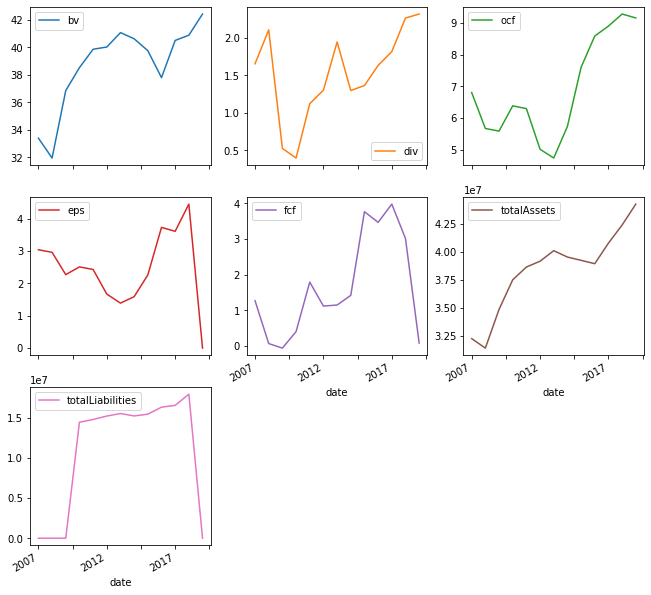

In [396]:
df_ccl[['bv','div','ocf','eps','fcf','totalAssets','totalLiabilities']].plot(subplots = True,
                                                                      figsize = (11,11)
                                                                      ,layout = (3,-1))

In [397]:
df_ccl['netCashUsedProvidedByFinancingActivities']

date
2007    -604000.0
2008    -315000.0
2009     -93000.0
2010    -404000.0
2011   -1093000.0
2012   -1190000.0
2013    -780000.0
2014   -1028000.0
2015    -942000.0
2016   -2591000.0
2017   -2452000.0
2018   -1460000.0
2019    -655000.0
Name: netCashUsedProvidedByFinancingActivities, dtype: float64

In [399]:
df_ccl[['pe','ps','pb']]

,pe,ps,pb
date,,,
2007,4.605263,0.642369,0.419376
2008,4.729730,0.571624,0.438371
2009,6.167401,0.636315,0.379941
2010,5.577689,0.578616,0.363510
2011,5.761317,0.530108,0.351292
2012,8.383234,0.544273,0.349868
2013,10.071942,0.541667,0.340935
2014,8.805031,0.527071,0.344697
2015,6.194690,0.532773,0.352194


In [400]:
df_ccl.payTurnOver

date
2007     3.285205
2008     5.136719
2009     3.512324
2010    18.075547
2011    17.880208
2012    18.797814
2013    16.625978
2014    16.618211
2015    15.066986
2016    13.159888
2017    13.780840
2018    15.190411
2019     3.498677
Name: payTurnOver, dtype: float64

In [402]:
annual_growth(1800000,239000.0,9)

0.25149901339364633

In [411]:
cf_ccl = [df_ccl.freeCashFlow.mean()]
grs = [0.05,0.1]


In [412]:
intrinsic_cash(cf_ccl, grs,drs,lgr,df_ccl.shares.values[0],9)

defaultdict(list,
            {'985.5384615384615,5.0%': [27.068527450483934,
              15.369191535417691,
              10.694779723514571],
             '985.5384615384615,10.0%': [39.082509463780376,
              21.024258810596102,
              14.026977876713353]})

In [416]:
intrinsic_bk(1.5,38,0.03,0.15,9)

21.251498830821404

# mgm

In [417]:
dict_mgm_cash,errs_mgm = url_import(['MGM'], 'cash-flow-statement')
dict_mgm_balance,errs_mgm = url_import(['MGM'], 'balance-sheet-statement')
dict_mgm_income,errs_mgm = url_import(['MGM'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/MGM?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/MGM?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/MGM?apikey=cb3b0c371586d9ce915d359479fe1c81


In [418]:
df_mgm_cash = pd.DataFrame(dict_mgm_cash)
df_mgm_bal = pd.DataFrame(dict_mgm_balance)
df_mgm_income = pd.DataFrame(dict_mgm_income)

In [419]:
df_mgm_bal.date = df_mgm_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_mgm_cash.date = df_mgm_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_mgm_income.date = df_mgm_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [420]:
df_mgm_bal.set_index(['date'], inplace = True)
df_mgm_cash.set_index(['date'], inplace = True)
df_mgm_income.set_index(['date'], inplace = True)

In [421]:
df_mgm_cash.drop('netIncome',axis = 1, inplace = True)
df_mgm_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [422]:
df_mgm = pd.concat([df_mgm_income,df_mgm_bal,df_mgm_cash],axis = 1)

In [423]:
df_mgm.drop(['symbol','period'],axis = 1, inplace =True)

In [424]:
df_mgm['shares'] = 493E06

In [425]:
df_mgm.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [426]:
df_mgm = df_mgm/1000

In [427]:
df_mgm[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_mgm[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [428]:
df_mgm = df_mgm.sort_index()

In [429]:
df_mgm_main = df_mgm.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [430]:
df_mgm_main['netIncome'] = df_mgm_income['netIncome'] / 1000

In [431]:
df_mgm = metrics(df_mgm)
df_mgm = price_ratios(df_mgm, 14)

# ANA

In [438]:
df_mgm.de.mean()

2.6667062623388427

In [440]:
df_mgm.curr.mean()

1.0021848793085257

In [443]:
df_mgm.intCov.median()

2.0684132961675448

In [437]:
df_mgm[['roe','rof','rocf']]

,roe,rof,rocf
2000,NaN,NaN,NaN
2001,0.067637,0.185530,0.316145
2002,0.109767,0.198157,0.310778
2003,0.096179,0.060279,0.277437
2004,0.148765,0.045598,0.299183
2005,0.137016,0.368036,0.365617
2006,0.168400,0.325578,0.322623
2007,0.261425,-0.317289,0.164076
2008,-0.215201,0.211103,0.189472
2009,-0.333731,0.157658,0.151899


In [445]:
df_mgm.bv

2000     4.832546
2001     5.092698
2002     5.403943
2003     5.139529
2004     5.622118
2005     6.562012
2006     7.808416
2007    12.293515
2008     8.061584
2009     7.850775
2010     6.082241
2011    12.346000
2012     8.855067
2013     8.582513
2014     8.298006
2015    10.385247
2016    12.616998
2017    15.441485
2018    13.209499
2019    15.673966
Name: bv, dtype: float64

# transport 
# cmre

In [505]:
dict_arl_cash,errs_arl = url_import(['ARLP'], 'cash-flow-statement')
dict_arl_balance,errs_arl = url_import(['ARLP'], 'balance-sheet-statement')
dict_arl_income,errs_arl = url_import(['ARLP'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/ARLP?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/ARLP?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/ARLP?apikey=cb3b0c371586d9ce915d359479fe1c81


In [506]:
df_arl_cash = pd.DataFrame(dict_arl_cash)
df_arl_bal = pd.DataFrame(dict_arl_balance)
df_arl_income = pd.DataFrame(dict_arl_income)

In [507]:
df_arl_bal.date = df_arl_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_arl_cash.date = df_arl_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_arl_income.date = df_arl_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [508]:
df_arl_bal.set_index(['date'], inplace = True)
df_arl_cash.set_index(['date'], inplace = True)
df_arl_income.set_index(['date'], inplace = True)

In [509]:
df_arl_cash.drop('netIncome',axis = 1, inplace = True)
df_arl_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [510]:
df_arl = pd.concat([df_arl_income,df_arl_bal,df_arl_cash],axis = 1)

In [511]:
df_arl.drop(['symbol','period'],axis = 1, inplace =True)

In [512]:
df_arl['shares'] = 127E06

In [513]:
df_arl.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [514]:
df_arl = df_arl/1000

In [515]:
df_arl[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_arl[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [516]:
df_arl = df_arl.sort_index()

In [517]:
df_arl_main = df_arl.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [518]:
df_arl_main['netIncome'] = df_arl_income['netIncome'] / 1000

In [519]:
df_arl = metrics(df_arl)
df_arl = price_ratios(df_arl, 3)

# ANA

In [520]:
df_arl.de

date
2010    1.584087
2011    1.128643
2012    1.121276
2013    1.019693
2014    0.809447
2015    0.830329
2016    0.504948
2017    0.426072
2018    0.554809
Name: de, dtype: float64

In [521]:
df_arl.debtRatio

date
2010    0.480924
2011    0.406580
2012    0.404403
2013    0.409068
2014    0.359400
2015    0.346722
2016    0.250483
2017    0.220034
2018    0.273934
Name: debtRatio, dtype: float64

In [525]:
df_arl.curr.mean()

1.4876282642090655

In [526]:
df_arl.intCov

date
2010    11.701450
2011    18.808509
2012    13.055327
2013    16.399867
2014    16.204383
2015    11.601740
2016    11.931983
2017     8.343583
2018     9.256726
Name: intCov, dtype: float64

In [527]:
df_arl[['roe','rof','rocf','fcfRatio']]

,roe,rof,rocf,fcfRatio
date,,,,
2010,0.704320,0.506193,1.142184,0.143295
2011,0.624205,0.404104,0.920201,0.136726
2012,0.475686,0.186017,0.787950,0.064506
2013,0.462257,0.441124,0.827798,0.170252
2014,0.490083,0.414089,0.728577,0.182607
2015,0.310301,0.510292,0.725940,0.221462
2016,0.311983,0.541872,0.646715,0.305204
2017,0.264923,0.358620,0.485209,0.228829
2018,0.310052,0.389772,0.587235,0.230104


In [528]:
df_arl[['totalAssets','totalLiabilities','totalDebt']].apply(lambda x: 
                                                            annual_growth(x[-1],x[0],9))

totalAssets         0.053254
totalLiabilities    0.016588
totalDebt          -0.010594
dtype: float64

In [531]:
annual_growth(9,3,9)

0.12983096390975302

In [529]:
df_arl[['bv','div']]

,bv,div
date,,
2010,3.588843,0.0
2011,4.911480,0.0
2012,5.554693,0.0
2013,6.702654,0.0
2014,7.988835,0.0
2015,7.769906,0.0
2016,8.565937,0.0
2017,9.024709,0.0
2018,9.310213,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127601b10>,
      dtype=object)

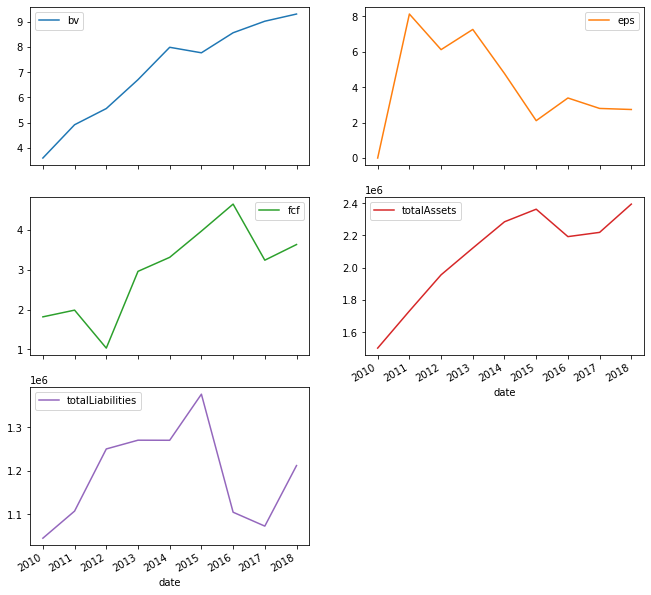

In [534]:
df_arl[['bv','eps','fcf','totalAssets','totalLiabilities']].plot(figsize = (11,11),
                                                                subplots = True,
                                                                layout = (3,-1))

In [535]:
df_arl.netCashUsedProvidedByFinancingActivities

date
2010     92683.0
2011   -238909.0
2012   -177722.0
2013   -213330.0
2014   -367032.0
2015   -351597.0
2016   -505405.0
2017   -344371.0
2018   -211702.0
Name: netCashUsedProvidedByFinancingActivities, dtype: float64

In [537]:
annual_growth(411028,230714.0,9)

0.06626802120749464

In [540]:
cf_arl = [df_arl.freeCashFlow.median()]
grs = [0.06,0.08]


In [541]:
intrinsic_cash(cf_arl,grs,drs,lgr,df_arl.shares.values[0],9)

defaultdict(list,
            {'411.028,6.0%': [57.19474805893805,
              32.10880303867122,
              22.1524771690997],
             '411.028,8.0%': [66.24289499448314,
              36.38385773917236,
              24.680440793984577]})

In [543]:
intrinsic_bk(0.6,8,0.07,0.15,9)

7.043789153119256

# dmlp 

In [551]:
dict_arc_cash,errs_arc = url_import(['ARCH'], 'cash-flow-statement')
dict_arc_balance,errs_arc = url_import(['ARCH'], 'balance-sheet-statement')
dict_arc_income,errs_arc = url_import(['ARCH'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/ARCH?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/ARCH?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/ARCH?apikey=cb3b0c371586d9ce915d359479fe1c81


In [552]:
df_arc_cash = pd.DataFrame(dict_arc_cash)
df_arc_bal = pd.DataFrame(dict_arc_balance)
df_arc_income = pd.DataFrame(dict_arc_income)

In [553]:
df_arc_bal.date = df_arc_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_arc_cash.date = df_arc_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_arc_income.date = df_arc_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [554]:
df_arc_bal.set_index(['date'], inplace = True)
df_arc_cash.set_index(['date'], inplace = True)
df_arc_income.set_index(['date'], inplace = True)

In [555]:
df_arc_cash.drop('netIncome',axis = 1, inplace = True)
df_arc_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [556]:
df_arc = pd.concat([df_arc_income,df_arc_bal,df_arc_cash],axis = 1)

In [557]:
df_arc.drop(['symbol','period'],axis = 1, inplace =True)

In [558]:
df_arc['shares'] = 15E06

In [559]:
df_arc.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [560]:
df_arc = df_arc/1000

In [561]:
df_arc[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_arc[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [562]:
df_arc = df_arc.sort_index()

In [563]:
df_arc_main = df_arc.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [564]:
df_arc_main['netIncome'] = df_arc_income['netIncome'] / 1000

In [565]:
df_arc = metrics(df_arc)
df_arc = price_ratios(df_arc, 26)

# ANA

In [569]:
df_arc.de.mean()

0.730573961866515

In [571]:
df_arc.debtRatio.mean()

0.34347919264687915

In [573]:
df_arc.curr.mean()

1.6966156627816895

In [574]:
df_arc.intCov

date
2003          NaN
2004          NaN
2005     1.020149
2006     5.230672
2007    -0.410953
2008    -0.070673
2009    -0.368501
2010         -inf
2011     1.796704
2012    -2.145882
2013    -1.739309
2014    -0.382485
2015    -7.199031
2016         -inf
2017     8.637651
2018    13.635777
2019    14.732787
Name: intCov, dtype: float64

In [576]:
df_arc[['roe','rof','rocf','fcfRatio']].median()

roe         0.071237
rof         0.181459
rocf        0.214996
fcfRatio    0.131615
dtype: float64

In [577]:
df_arc[['totalAssets','totalLiabilities','totalDebt','fcf','ocf']].apply(lambda x: 
                                                                        annual_growth(
                                                                        x[-1],x[8],7))

totalAssets        -0.215506
totalLiabilities   -0.214242
totalDebt          -0.306851
fcf                 0.061022
ocf                -0.058961
dtype: float64

In [579]:
365 / df_arc[['recTurnOver','payTurnOver','invTurnOver','gcf']]

,recTurnOver,payTurnOver,invTurnOver,gcf
date,,,,
2003,inf,NaN,inf,NaN
2004,inf,NaN,inf,NaN
2005,2.556425e+01,43.128792,21.946939,318.757628
2006,3.579296e+01,38.008451,24.811993,163.454088
2007,3.843232e+01,28.999590,34.365324,284.110754
2008,3.110637e+01,31.140091,32.016858,469.884095
2009,2.838864e+01,22.633115,42.441012,123.664124
2010,2.653192e+01,30.198046,35.895905,653.918508
2011,3.241264e+01,42.865449,42.162682,67.035734


In [ ]:
annual_growth(42,)

In [580]:
df_arc[['bv','div']]

,bv,div
date,,
2003,0.000000,0.000000
2004,0.000000,0.000000
2005,78.949400,1.842600
2006,91.039600,2.121000
2007,102.112400,2.596333
2008,115.248867,3.256467
2009,141.007067,3.664600
2010,149.167133,4.224867
2011,238.536000,5.383200


In [581]:
df_arc.freeCashFlow

date
2003         0.0
2004         0.0
2005    172439.0
2006    308879.0
2007    401106.0
2008    680272.0
2009    383805.0
2010    697477.0
2011    101306.0
2012    -62421.0
2013   -241242.0
2014   -180868.0
2015   -163391.0
2016     84192.0
2017    337268.0
2018    322691.0
2019    153358.0
Name: freeCashFlow, dtype: float64

# sbr

In [609]:
dict_apy_cash,errs_apy = url_import(['APY'], 'cash-flow-statement')
dict_apy_balance,errs_apy = url_import(['APY'], 'balance-sheet-statement')
dict_apy_income,errs_apy = url_import(['APY'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/APY?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/APY?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/APY?apikey=cb3b0c371586d9ce915d359479fe1c81


In [610]:
df_apy_cash = pd.DataFrame(dict_apy_cash)
df_apy_bal = pd.DataFrame(dict_apy_balance)
df_apy_income = pd.DataFrame(dict_apy_income)

In [611]:
df_apy_bal.date = df_apy_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_apy_cash.date = df_apy_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_apy_income.date = df_apy_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [612]:
df_apy_bal.set_index(['date'], inplace = True)
df_apy_cash.set_index(['date'], inplace = True)
df_apy_income.set_index(['date'], inplace = True)

In [613]:
df_apy_cash.drop('netIncome',axis = 1, inplace = True)
df_apy_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [614]:
df_apy = pd.concat([df_apy_income,df_apy_bal,df_apy_cash],axis = 1)

In [615]:
df_apy.drop(['symbol','period'],axis = 1, inplace =True)

In [616]:
df_apy['shares'] = 77E06

In [617]:
df_apy.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [618]:
df_apy = df_apy/1000

In [619]:
df_apy[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_apy[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [620]:
df_apy = df_apy.sort_index()

In [621]:
df_apy_main = df_apy.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [622]:
df_apy_main['netIncome'] = df_apy_income['netIncome'] / 1000

In [623]:
df_apy = metrics(df_apy)
df_apy = price_ratios(df_apy, 9)

# ana

In [624]:
df_apy.de

date
2018    0.711389
2019    0.546648
Name: de, dtype: float64

In [625]:
df_apy.debtRatio

date
2018    0.353238
2019    0.293665
Name: debtRatio, dtype: float64

In [605]:
df_apy.debtRatio

2002    0.000000
2003    0.000000
2004    0.000000
2005    0.000000
2006    0.000000
2007    0.000000
2008    0.000000
2009    0.000000
2010    0.000000
2011    0.000630
2012    0.000404
2013    0.000098
2014    0.000000
2015    0.000312
2016    0.000000
2017    0.007214
2018    0.008985
2019    0.021346
Name: debtRatio, dtype: float64

In [626]:
df_apy.curr

date
2018    2.625362
2019    2.471141
Name: curr, dtype: float64

In [627]:
df_apy.intCov


date
2018    inf
2019    inf
Name: intCov, dtype: float64

In [628]:
df_apy[['roe','rof','rocf','fcfRatio']]

,roe,rof,rocf,fcfRatio
date,,,,
2018,0.096051,0.108248,0.167404,0.087110
2019,0.050500,0.112414,0.150925,0.102647


# misc 
# xrx

In [645]:
dict_ebix_cash,errs_ebix = url_import(['EBIX'], 'cash-flow-statement')
dict_ebix_balance,errs_ebix = url_import(['EBIX'], 'balance-sheet-statement')
dict_ebix_income,errs_ebix = url_import(['EBIX'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/EBIX?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/EBIX?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/EBIX?apikey=cb3b0c371586d9ce915d359479fe1c81


In [646]:
df_ebix_cash = pd.DataFrame(dict_ebix_cash)
df_ebix_bal = pd.DataFrame(dict_ebix_balance)
df_ebix_income = pd.DataFrame(dict_ebix_income)

In [647]:
df_ebix_bal.date = df_ebix_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_ebix_cash.date = df_ebix_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_ebix_income.date = df_ebix_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [648]:
df_ebix_bal.set_index(['date'], inplace = True)
df_ebix_cash.set_index(['date'], inplace = True)
df_ebix_income.set_index(['date'], inplace = True)

In [649]:
df_ebix_cash.drop('netIncome',axis = 1, inplace = True)
df_ebix_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [650]:
df_ebix = pd.concat([df_ebix_income,df_ebix_bal,df_ebix_cash],axis = 1)

In [651]:
df_ebix.drop(['symbol','period'],axis = 1, inplace =True)

In [652]:
df_ebix['shares'] = 30E06

In [653]:
df_ebix.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [654]:
df_ebix = df_ebix/1000

In [655]:
df_ebix[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_ebix[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [656]:
df_ebix = df_ebix.sort_index()

In [657]:
df_ebix_main = df_ebix.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [658]:
df_ebix_main['netIncome'] = df_ebix_income['netIncome'] / 1000

In [659]:
df_ebix = metrics(df_ebix)
df_ebix = price_ratios(df_ebix, 17)

# ANA

In [661]:
df_ebix.de.mean()

0.22747255286431695

In [662]:
df_ebix.debtRatio

date
2001    0.018511
2002    0.010636
2003    0.154624
2004    0.120408
2005    0.100533
2006    0.041160
2007    0.153405
2008    0.373069
2009    0.202344
2010    0.034866
2011    0.020996
2012    0.062883
2013    0.037827
2014    0.002410
2015    0.000948
2016    0.191648
2017    0.246669
2018    0.272597
2019    0.022171
Name: debtRatio, dtype: float64

In [663]:
df_ebix.curr

date
2001    1.434325
2002    1.585913
2003    1.906801
2004    1.178011
2005    1.488362
2006    1.875962
2007    2.311299
2008    0.473948
2009    0.619399
2010    1.555123
2011    1.282006
2012    1.440624
2013    1.535043
2014    1.488278
2015    2.278898
2016    2.339364
2017    1.721422
2018    1.346384
2019    1.549414
Name: curr, dtype: float64

In [664]:
df_ebix.intCov

date
2001     2.680556
2002    20.358974
2003    99.470588
2004    10.837838
2005    15.097403
2006    21.721683
2007    35.756983
2008    17.997540
2009    36.687850
2010    58.211752
2011    90.577075
2012    49.972745
2013    61.179445
2014    26.259723
2015    20.578520
2016    13.595580
2017     8.460061
2018     5.644773
2019     3.677431
Name: intCov, dtype: float64

In [671]:
df_ebix[['roe','rof','rocf','fcfRatio']].mean()

roe         0.200531
rof         0.134751
rocf        0.142586
fcfRatio    0.207711
dtype: float64

In [668]:
df_ebix[['totalAssets','totalLiabilities','totalDebt','fcf']].apply(lambda x: 
                                                                   annual_growth(
                                                                   x[-1],x[9],9))

totalAssets         0.202254
totalLiabilities    0.345563
totalDebt           0.143269
fcf                 0.006374
dtype: float64

In [669]:
df_ebix.freeCashFlow

date
2001    -3239.0
2002     -742.0
2003     3343.0
2004     2810.0
2005     5483.0
2006     4150.0
2007    14471.0
2008    26825.0
2009    33877.0
2010    52779.0
2011    68457.0
2012    70330.0
2013    55832.0
2014    42233.0
2015    34692.0
2016    77771.0
2017    69422.0
2018    79503.0
2019    55885.0
Name: freeCashFlow, dtype: float64

In [673]:
annual_growth(0.31,0.05,7)

0.2977732340069208

In [675]:
df_ebix[['bv','div']].mean()

bv     7.866961
div    0.124649
dtype: float64

# hal

In [733]:
df_xrx.bv

date
2019    26.353774
Name: bv, dtype: float64

In [735]:
intrinsic_cash([1000E03],[0.05,0.1],drs,lgr,df_xrx.shares.values[0],5)

defaultdict(list,
            {'1000.0,5.0%': [73.06003928673319,
              41.55754267645297,
              28.909476827437295],
             '1000.0,10.0%': [92.99191374663074,
              51.69033627816972,
              35.26012440592297]})

In [740]:
intrinsic_bk(1,23,0.03,0.15,4)

17.655784609117326

In [727]:
dict_fox_cash,errs_fox = url_import(['BK'], 'cash-flow-statement')
dict_fox_balance,errs_fox = url_import(['FOXA'], 'balance-sheet-statement')
dict_fox_income,errs_fox = url_import(['FOXA'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/BK?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/FOXA?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/FOXA?apikey=cb3b0c371586d9ce915d359479fe1c81


In [703]:
df_fox_cash = pd.DataFrame(dict_fox_cash)
df_fox_bal = pd.DataFrame(dict_fox_balance)
df_fox_income = pd.DataFrame(dict_fox_income)

In [704]:
df_fox_bal.date = df_fox_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_fox_cash.date = df_fox_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_fox_income.date = df_fox_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [705]:
df_fox_bal.set_index(['date'], inplace = True)
df_fox_cash.set_index(['date'], inplace = True)
df_fox_income.set_index(['date'], inplace = True)

In [706]:
df_fox_cash.drop('netIncome',axis = 1, inplace = True)
df_fox_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [707]:
df_fox = pd.concat([df_fox_income,df_fox_bal,df_fox_cash],axis = 1)

In [708]:
df_fox.drop(['symbol','period'],axis = 1, inplace =True)

In [709]:
df_fox['shares'] = 83E06

In [710]:
df_fox.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [711]:
df_fox = df_fox/1000

In [712]:
df_fox[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_fox[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [713]:
df_fox = df_fox.sort_index()

In [714]:
df_fox_main = df_fox.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [715]:
df_fox_main['netIncome'] = df_fox_income['netIncome'] / 1000

In [716]:
df_fox = metrics(df_fox)
df_fox = price_ratios(df_fox, 30)

# ANA

In [717]:
df_fox.de

2002   -4.889764
2003   -0.021505
2004   -0.041667
2005    0.014286
2006    0.006645
2007    0.737705
2008    0.003929
2009    0.057391
2010    0.503791
2011    0.312765
2012    0.258123
2013    0.254223
2014    0.362031
2015    0.488725
2016    0.553217
2017    0.541703
2018    0.723752
2019    0.733075
Name: de, dtype: float64

In [718]:
df_fox.debtRatio

2002    0.877119
2003    0.002770
2004    0.001289
2005    0.003409
2006    0.001976
2007    0.297170
2008    0.001653
2009    0.026485
2010    0.264049
2011    0.182327
2012    0.160065
2013    0.160667
2014    0.204429
2015    0.263555
2016    0.286887
2017    0.291237
2018    0.338798
2019    0.338842
Name: debtRatio, dtype: float64

In [719]:
df_fox.curr

2002    0.318357
2003    1.865031
2004    1.726852
2005    1.897436
2006    1.940639
2007    1.782787
2008    2.142857
2009    2.293532
2010    2.417193
2011    2.118384
2012    2.446664
2013    2.442873
2014    2.194784
2015    2.166097
2016    2.232438
2017    2.505532
2018    2.068564
2019    2.185059
Name: curr, dtype: float64

In [720]:
df_fox.intCov

2002          NaN
2003    -8.500000
2004    -1.130814
2005    -3.151515
2006    -3.785714
2007    -5.428571
2008    -6.500000
2009    -3.961538
2010     5.594828
2011    16.551724
2012    24.880000
2013    37.109589
2014    38.225000
2015    23.408451
2016    16.294118
2017    12.795620
2018     9.846154
2019     9.345055
Name: intCov, dtype: float64

In [741]:
df_fox[['roe','rof','rocf','fcfRatio']]

NameError: name 'df_fox' is not defined

In [701]:
df_fox.bv

date
2010    11.827822
2011    15.049031
2012    17.976055
2013    15.485747
2014    18.548461
2015    17.630559
2016    10.728620
2017     9.489168
2018    10.857469
2019     9.135690
Name: bv, dtype: float64

In [724]:
df_fox[['totalAssets','totalLiabilities','totalDebt','fcf']].apply(lambda x: 
                                                                   annual_growth(
                                                                   x[-1],x[8],9))

totalAssets         0.106520
totalLiabilities    0.121658
totalDebt           0.137612
fcf                 0.156249
dtype: float64

In [742]:
dict_bk_cash,errs_bk = url_import(['BK'], 'cash-flow-statement')
dict_bk_balance,errs_bk = url_import(['BK'], 'balance-sheet-statement')
dict_bk_income,errs_bk = url_import(['BK'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/BK?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/BK?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/BK?apikey=cb3b0c371586d9ce915d359479fe1c81


In [743]:
df_bk_cash = pd.DataFrame(dict_bk_cash)
df_bk_bal = pd.DataFrame(dict_bk_balance)
df_bk_income = pd.DataFrame(dict_bk_income)

In [744]:
df_bk_bal.date = df_bk_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_bk_cash.date = df_bk_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_bk_income.date = df_bk_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [745]:
df_bk_bal.set_index(['date'], inplace = True)
df_bk_cash.set_index(['date'], inplace = True)
df_bk_income.set_index(['date'], inplace = True)

In [746]:
df_bk_cash.drop('netIncome',axis = 1, inplace = True)
df_bk_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [747]:
df_bk = pd.concat([df_bk_income,df_bk_bal,df_bk_cash],axis = 1)

In [748]:
df_bk.drop(['symbol','period'],axis = 1, inplace =True)

In [749]:
df_bk['shares'] = 885E06

In [750]:
df_bk.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [751]:
df_bk = df_bk/1000

In [752]:
df_bk[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_bk[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [753]:
df_bk = df_bk.sort_index()

In [754]:
df_bk_main = df_bk.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [755]:
df_bk_main['netIncome'] = df_bk_income['netIncome'] / 1000

In [756]:
df_bk = metrics(df_bk)
df_bk = price_ratios(df_bk, 32)

In [757]:
df_bk.de

date
2010    0.510818
2011    0.596792
2012    0.517911
2013    0.531969
2014    0.541225
2015    0.566475
2016    0.630311
2017    0.752806
2018    0.765343
2019    0.758383
Name: de, dtype: float64

In [758]:
df_bk.debtRatio

date
2010    0.066841
2011    0.061313
2012    0.052559
2013    0.053325
2014    0.052592
2015    0.054718
2016    0.073359
2017    0.083533
2018    0.085710
2019    0.082462
Name: debtRatio, dtype: float64

In [759]:
df_bk.curr

date
2010    6316.000000
2011    7912.700000
2012     411.976331
2013     826.135417
2014            inf
2015            inf
2016            inf
2017      26.066016
2018      44.600309
2019      22.611518
Name: curr, dtype: float64

In [760]:
df_bk[['roe','rof','rocf','fcfRatio']]

,roe,rof,rocf,fcfRatio
date,,,,
2010,0.077827,0.118069,0.125178,1.305983
2011,0.075291,0.046952,0.066164,0.525804
2012,0.067113,0.026818,0.044715,0.328624
2013,0.056262,-0.033341,-0.017110,-0.415753
2014,0.068561,0.098635,0.119762,1.282292
2015,0.083024,0.092699,0.108500,1.165235
2016,0.091392,0.139677,0.160934,1.727533
2017,0.099149,0.083489,0.112506,1.041112
2018,0.104976,0.120282,0.147547,1.353642


In [763]:
annual_growth(1.2,.49,9)

0.1046395132682385

In [764]:
df_bk[['bv','div']].mean()

bv     42.642260
div     0.870847
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a389dd0>,
      dtype=object)

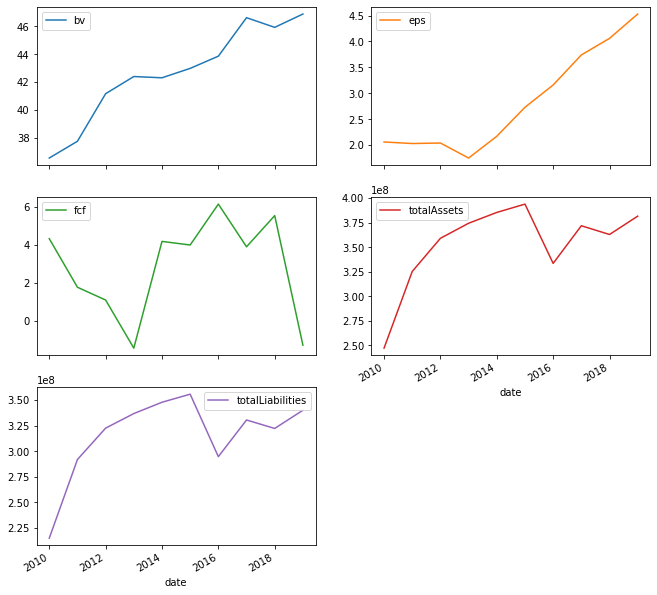

In [766]:
df_bk[['bv','eps','fcf','totalAssets','totalLiabilities']].plot(subplots = True, 
                                                               layout = (3,-1),
                                                               figsize = (11,11))

In [767]:
df_bk[['pe','ps','pb']]

,pe,ps,pb
date,,,
2010,15.533981,9.682051,0.875317
2011,15.763547,9.490617,0.847473
2012,15.686275,9.525732,0.777360
2013,18.285714,9.411765,0.754777
2014,14.746544,9.833333,0.756390
2015,11.721612,9.358890,0.744538
2016,10.126582,9.024857,0.729690
2017,8.556150,8.561064,0.686529
2018,7.881773,7.842703,0.696885


In [769]:
annual_growth(4888000.0,3820000,9)

0.02777115794612728

In [775]:
df_bk.freeCashFlow.median()

3485000.0

In [776]:
cf_bk = [df_bk.freeCashFlow.median()]
grs = [0.03,0.05]

In [777]:
intrinsic_cash(cf_bk,grs,drs,lgr,df_bk.shares.values[0],9)

defaultdict(list,
            {'3485.0,3.0%': [55.90234461895242,
              32.49176845967685,
              23.004046052281222],
             '3485.0,5.0%': [64.67728016409549,
              36.72299901242258,
              25.55400421158385]})

In [779]:
intrinsic_bk(0.9,43,0.03,0.15,9)

20.243038340984995

In [780]:
dict_usb_cash,errs_usb = url_import(['USB'], 'cash-flow-statement')
dict_usb_balance,errs_usb = url_import(['USB'], 'balance-sheet-statement')
dict_usb_income,errs_usb = url_import(['USB'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/USB?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/USB?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/USB?apikey=cb3b0c371586d9ce915d359479fe1c81


In [781]:
df_usb_cash = pd.DataFrame(dict_usb_cash)
df_usb_bal = pd.DataFrame(dict_usb_balance)
df_usb_income = pd.DataFrame(dict_usb_income)

In [782]:
df_usb_bal.date = df_usb_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_usb_cash.date = df_usb_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_usb_income.date = df_usb_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [783]:
df_usb_bal.set_index(['date'], inplace = True)
df_usb_cash.set_index(['date'], inplace = True)
df_usb_income.set_index(['date'], inplace = True)

In [784]:
df_usb_cash.drop('netIncome',axis = 1, inplace = True)
df_usb_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [785]:
df_usb = pd.concat([df_usb_income,df_usb_bal,df_usb_cash],axis = 1)

In [786]:
df_usb.drop(['symbol','period'],axis = 1, inplace =True)

In [787]:
df_usb['shares'] = 1.5E09

In [788]:
df_usb.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [789]:
df_usb = df_usb/1000

In [790]:
df_usb[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_usb[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [791]:
df_usb = df_usb.sort_index()

In [792]:
df_usb_main = df_usb.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [793]:
df_usb_main['netIncome'] = df_usb_income['netIncome'] / 1000

In [795]:
df_usb = metrics(df_usb)
df_usb = price_ratios(df_usb, 30)

In [796]:
df_usb[['de','debtRatio']]

,de,debtRatio
date,,
2010,NaN,NaN
2011,NaN,NaN
2012,1.328735,0.146439
2013,1.159171,0.130918
2014,1.429495,0.154406
2015,1.299668,0.142123
2016,0.999746,0.106031
2017,0.997349,0.105857
2018,1.087205,0.118704


In [797]:
df_usb[['curr','intCov']]

,curr,intCov
date,,
2010,NaN,NaN
2011,NaN,NaN
2012,1.839822,2.641254
2013,1.789771,4.618679
2014,2.232061,5.502409
2015,2.623812,5.731620
2016,5.871876,4.945088
2017,5.263468,3.506063
2018,6.193366,2.666872


In [801]:
df_usb[['roe','rof','rocf','fcfRatio']]

,roe,rof,rocf,fcfRatio
date,,,,
2010,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN
2012,0.144802,0.204062,0.204062,0.740624
2013,0.141950,0.278403,0.278403,1.079404
2014,0.134571,0.122634,0.122634,0.494849
2015,0.127441,0.190371,0.190371,0.798291
2016,0.124487,0.112817,0.112817,0.462873
2017,0.126794,0.131974,0.131974,0.528715
2018,0.139058,0.207020,0.207020,0.817710


In [804]:
df_usb[['totalAssets','totalLiabilities','totalDebt','fcf']].apply(lambda x: 
                                                                 annual_growth(x[-1],x[2],9))

totalAssets         0.038100
totalLiabilities    0.038817
totalDebt           0.023542
fcf                -0.052693
dtype: float64

In [807]:
annual_growth(1.6,0.8,7)

0.10408951367381225

In [810]:
df_usb[['bv','div']].median()

bv     29.870000
div     1.167667
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128b71910>,
      dtype=object)

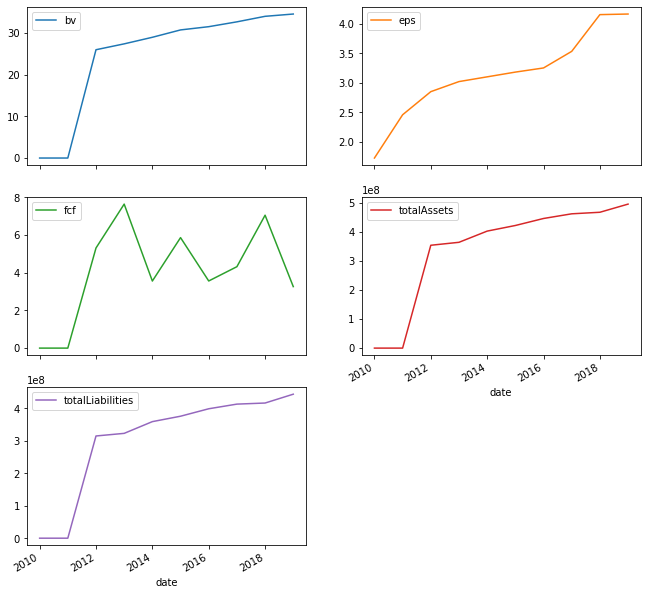

In [811]:
df_usb[['bv','eps','fcf','totalAssets','totalLiabilities']].plot(subplots = True, 
                                                               layout = (3,-1),
                                                               figsize = (11,11))

In [812]:
df_usb[['pe','ps','pb']]

,pe,ps,pb
date,,,
2010,17.341040,inf,inf
2011,12.195122,inf,inf
2012,10.526316,4.187994,1.153905
2013,9.933775,4.243682,1.094544
2014,9.677419,4.176334,1.034982
2015,9.433962,4.090537,0.975483
2016,9.230769,3.903539,0.951414
2017,8.498584,3.676170,0.917618
2018,7.228916,3.483242,0.881851


In [814]:
annual_growth(6472000,5332000.0,6)

0.032820211084701345

In [817]:
cf_usb = [df_usb.freeCashFlow.median()]
grs= [0.03,0.05]


In [818]:
intrinsic_cash(cf_usb,grs,drs,lgr,df_usb.shares.values[0],7 )

defaultdict(list,
            {'5904.0,3.0%': [55.58941948933146,
              32.154065454102856,
              22.687943530150424],
             '5904.0,5.0%': [62.89084897444077,
              35.7833573945439,
              24.926666184930244]})

In [820]:
intrinsic_bk(1.2,30,0.05,0.15,7)

20.86193871365296

In [843]:
dict_als_cash,errs_als = url_import(['ALSN'], 'cash-flow-statement')
dict_als_balance,errs_als = url_import(['ALSN'], 'balance-sheet-statement')
dict_als_income,errs_als = url_import(['ALSN'], 'income-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/ALSN?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/ALSN?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/income-statement/ALSN?apikey=cb3b0c371586d9ce915d359479fe1c81


In [844]:
df_als_cash = pd.DataFrame(dict_als_cash)
df_als_bal = pd.DataFrame(dict_als_balance)
df_als_income = pd.DataFrame(dict_als_income)

In [845]:
df_als_bal.date = df_als_bal.date.map(lambda x: re.sub(r'-.*$','',x))
df_als_cash.date = df_als_cash.date.map(lambda x: re.sub(r'-.*$','',x))
df_als_income.date = df_als_income.date.map(lambda x: re.sub(r'-.*$','',x))

In [846]:
df_als_bal.set_index(['date'], inplace = True)
df_als_cash.set_index(['date'], inplace = True)
df_als_income.set_index(['date'], inplace = True)

In [847]:
df_als_cash.drop('netIncome',axis = 1, inplace = True)
df_als_cash.rename({'inventory': 'inventoryCash'}, axis = 1, inplace = True)

In [848]:
df_als = pd.concat([df_als_income,df_als_bal,df_als_cash],axis = 1)

In [849]:
df_als.drop(['symbol','period'],axis = 1, inplace =True)

In [850]:
df_als['shares'] = 117E06

In [851]:
df_als.drop(['fillingDate','finalLink','link'],axis = 1,inplace = True)

In [852]:
df_als = df_als/1000

In [853]:
df_als[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] = df_als[['grossProfitRatio',
 'ebitdaratio',
 'operatingIncomeRatio',
 'incomeBeforeTaxRatio',
 'netIncomeRatio','eps']] * 1000

In [854]:
df_als = df_als.sort_index()

In [855]:
df_als_main = df_als.loc[:,['netIncomeRatio','totalLiabilities','totalAssets','totalStockholdersEquity']]

In [856]:
df_als_main['netIncome'] = df_als_income['netIncome'] / 1000

In [857]:
df_als = metrics(df_als)
df_als = price_ratios(df_als, 30)

In [858]:
df_als[['de','debtRatio']]

,de,debtRatio
date,,
2012,2.078856,0.579696
2013,1.861482,0.556518
2014,1.803191,0.524645
2015,2.000000,0.539243
2016,1.998241,0.511710
2017,3.695210,0.605470
2018,3.828528,0.595468
2019,3.224072,0.565843


In [860]:
df_als[['curr','intCov','recTurnOver','invTurnOver']]

,curr,intCov,recTurnOver,invTurnOver
date,,,,
2012,1.297777,inf,12.980606,7.558880
2013,1.567407,inf,11.003998,6.763716
2014,2.191385,inf,10.257473,8.024390
2015,2.024951,inf,10.183590,7.439887
2016,1.600234,inf,9.345861,7.770701
2017,1.515588,inf,10.235294,7.344156
2018,1.701878,inf,9.724014,7.594118
2019,1.645084,inf,10.664032,6.552764


In [863]:
df_als[['roe','rof','rocf','fcfRatio']]

,roe,rof,rocf,fcfRatio
date,,,,
2012,0.378952,0.275333,0.366645,0.174433
2013,0.114957,0.263483,0.315193,0.196751
2014,0.163543,0.352554,0.398412,0.231644
2015,0.153374,0.439004,0.487885,0.262766
2016,0.198926,0.481533,0.546885,0.282687
2017,0.731495,0.822932,0.955007,0.250663
2018,0.969651,1.118361,1.270106,0.271655
2019,0.773367,0.864277,1.084507,0.250185


In [864]:
df_als.totalDebt

date
2012    2820800.0
2013    2678300.0
2014    2520500.0
2015    2377200.0
2016    2158700.0
2017    2546000.0
2018    2523000.0
2019    2518000.0
Name: totalDebt, dtype: float64

In [867]:
annual_growth(0.62,0.28,7)

0.12026068276791113

In [868]:
df_als[['bv','div']].mean()

bv     9.178846
div    0.694124
dtype: float64

In [869]:
df_als[['pe','pb','ps']]

,pe,pb,ps
date,,,
2012,10.600707,2.586779,1.638808
2013,33.333333,2.439533,1.821673
2014,23.622047,2.511089,1.649901
2015,29.126214,2.953054,1.767550
2016,23.437500,3.249097,1.907401
2017,8.875740,5.094340,1.551724
2018,6.237006,5.326252,1.293771
2019,6.060606,4.494238,1.300964


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127946490>,
      dtype=object)

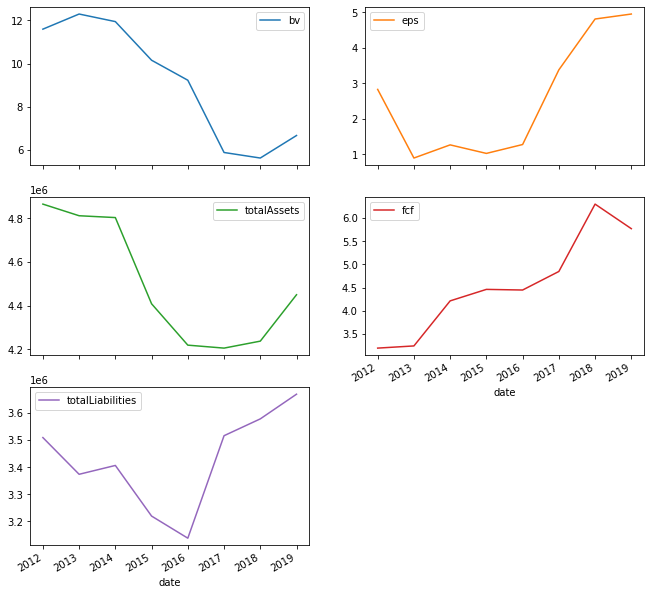

In [870]:
df_als[['bv','eps','totalAssets','fcf','totalLiabilities']].plot(subplots = True,
                                                                figsize = (11,11)
                                                                ,layout = (3,-1))

In [873]:
df_als['gcf']

date
2012    0.276985
2013    0.157663
2014    0.097863
2015    0.107950
2016    0.123561
2017    0.136778
2018    0.123059
2019    0.478158
Name: gcf, dtype: float64

In [874]:
df_als['totalDebt']

date
2012    2820800.0
2013    2678300.0
2014    2520500.0
2015    2377200.0
2016    2158700.0
2017    2546000.0
2018    2523000.0
2019    2518000.0
Name: totalDebt, dtype: float64

In [883]:
df_als.revenue

date
2012    2141800.0
2013    1926800.0
2014    2127400.0
2015    1985800.0
2016    1840200.0
2017    2262000.0
2018    2713000.0
2019    2698000.0
Name: revenue, dtype: float64

In [876]:
annual_growth(675000.0,373600.0,7)

0.08817703907145091

In [881]:
grs = [0.04,0.08]

In [880]:
cf_als = [df_als.freeCashFlow.mean()]

In [885]:
intrinsic_cash(cf_als,grs,drs,lgr,df_als.shares.values[0],7)

defaultdict(list,
            {'533.3125,4.0%': [68.47714815429296,
              39.280007493405684,
              27.53758884361332],
             '533.3125,8.0%': [87.58353889836029,
              48.6893099829614,
              33.29079188360013]})

In [887]:
intrinsic_bk(0.7,7,0.03,0.15,7)

6.148779796818418